In [1]:
import librosa
import librosa.display
import obspy
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py

In [2]:
directory = "./data/wav"

# get list of filenames in the directory
filenames = os.listdir(directory)

# create list of paths of wav files
wav_files_paths = []
for filename in filenames:
    if filename[-4:] == ".wav":
        # print(filename)
        wav_files_paths.append("./data/wav/" + filename)

In [3]:
# create np array 
full_audio_data = np.array([])
full_audio_data_list = []
for path in wav_files_paths:
    y, sr = librosa.load(path) # data, sampling rate
    full_audio_data_list.append(y)

full_audio_data = np.concatenate(full_audio_data_list)

./data/wav/OS_7_05_2019_08_24_00_.wav


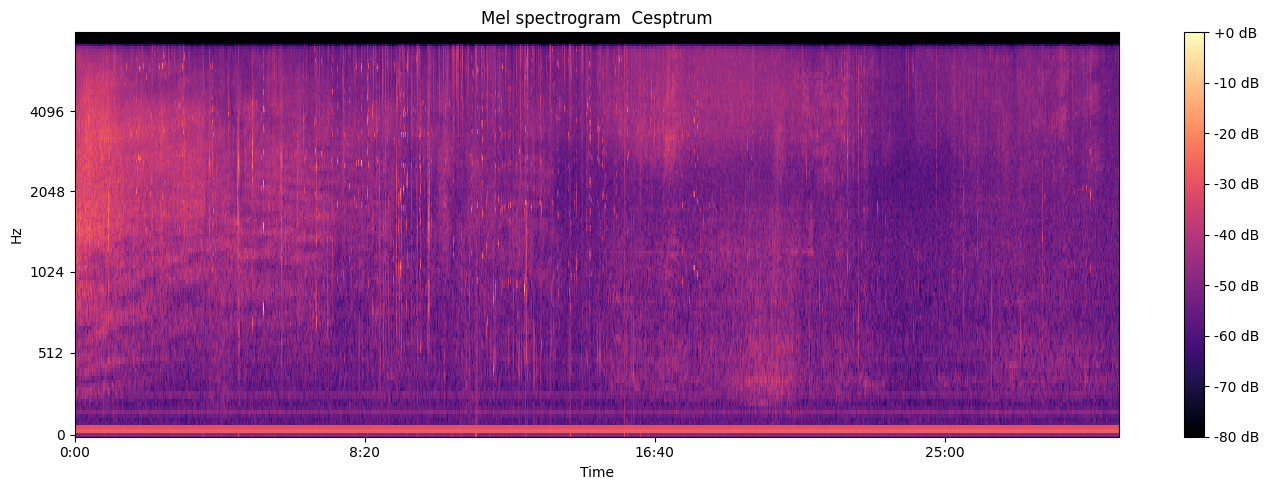

In [4]:
# plotting spectogram of first audio data in np array
y, sr = librosa.load(wav_files_paths[0])
print(wav_files_paths[0])
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# convert to decibels
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

# plot the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(spectrogram_db, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram  Cesptrum')
plt.tight_layout()
plt.show()

In [5]:
# export np array into h5 file
filename = "./data/audio_data.h5"
with h5py.File(filename, 'w') as f:
    f.create_dataset('orca_audio_data', data=full_audio_data)

In [6]:
# # export np array into csv file
# filename = './data/audio_data.csv'

# # save the mp array to a CSV file
# np.savetxt(filename, full_audio_data, delimiter=',')

In [7]:
# For one .wave file

# Splitting wav data into minute-long snippets

# Load the .wav file
file_path = './data/wav/1562337136_0004.wav'
data, sample_rate = librosa.load(file_path, sr=None)

# Calculate the length of each segment in samples
segment_length = sample_rate * 60  # 60 seconds per minute

# Calculate the number of segments
num_segments = len(data) // segment_length

# Reshape the data into segments
segments = np.reshape(data[:num_segments * segment_length], (num_segments, segment_length))

# Handle any remaining samples that are < a minute
remaining_samples = len(data) % segment_length
if remaining_samples > 0:
    # Code for handling
    pass

print(segments[0])

[-0.00723651 -0.00939059 -0.01647171 ...  0.0038406   0.00840938
  0.00697252]


In [8]:
# Calculate the length of each segment in samples
segment_length = sample_rate * 60


full_audio_data_split = np.array([])
full_audio_data_list_split = []
for path in wav_files_paths:
    data, sr = librosa.load(path) # data, sampling rate
    
    # Calculate the number of segments
    num_segments = len(data) // segment_length
    
    # Reshape the data into segments
    segments = np.reshape(data[:num_segments * segment_length], 
                          (num_segments, segment_length))
    
    full_audio_data_list_split.append(segments)
    
    

full_audio_data_split = np.concatenate(full_audio_data_list_split)
print(len(full_audio_data_split))

1083
